<a href="https://colab.research.google.com/github/ajaykumar6666/Yann-LeCun-LeNet-on-CIFAR10/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms

In [2]:
trainset=torchvision.datasets.CIFAR10('/content/sample_data',train=True,download=True,transform=transforms.ToTensor())

Extracting /content/sample_data/cifar-10-python.tar.gz to /content/sample_data


In [3]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/sample_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [ ]:
images,labels=next(iter(trainloader))

In [ ]:
images.shape

torch.Size([10, 3, 32, 32])

In [ ]:
images[0].shape

torch.Size([3, 32, 32])

In [4]:
classes=trainset.classes

In [5]:
class_indx=trainset.class_to_idx

In [6]:
class_indx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [ ]:
img=images[0].numpy()
print(img.shape)
print(type(img))
print(type(images[0]))

(3, 32, 32)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [7]:
def get_image(image,title):
  image=image.numpy()
  img=np.transpose(image,(1,2,0))
  plt.imshow(img)
  plt.title(title)
  plt.show()

In [ ]:
labels[0]

tensor(3, device='cuda:0')

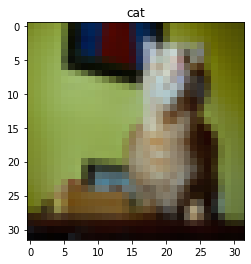

In [ ]:
get_image(images[0],classes[labels[0]])

In [8]:
from torchvision.utils import make_grid

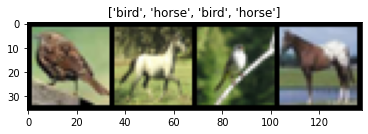

In [ ]:
get_image(make_grid(images),[classes[labels[j]] for j in range(len(labels))])

In [ ]:
print(images.shape)
print(labels.shape)
print(images[0].shape)

torch.Size([4, 3, 32, 32])
torch.Size([4])
torch.Size([3, 32, 32])


In [9]:
import torch.nn as nn

In [ ]:
class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1=nn.Conv2d(3,16,3) ##input channel size=3 (R,G,B), 16 indicates output and last 3 indicates kernel size(3 * 3)

  def forward(self,x):
    x=self.conv1(x)
    return x

In [ ]:
cnn=FirstCNN()

In [ ]:
cnn

FirstCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
)

In [ ]:
out=cnn(images)

In [ ]:
out.shape

torch.Size([4, 16, 30, 30])

In [ ]:
for param in cnn.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [ ]:
class FirstCNN_V2(nn.Module):
  def __init__(self):
    super(FirstCNN_V2,self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,8,3), #(N,3,32,32) --> (N,8,30,30) no padding 
        nn.Conv2d(8,16,3) #(N,8,30,30) --> (N,16,28,28) no padding 
    )

  def forward(self,x):
    x=self.model(x)
    return x

In [ ]:
net=FirstCNN_V2()

In [ ]:
out=net(images)

In [ ]:
out.shape

torch.Size([4, 16, 28, 28])

In [ ]:
class FirstCNN_V2(nn.Module):
  def __init__(self):
    super(FirstCNN_V2,self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,6,5),                      #(N,3,32,32) --> (N,6,28,28) no padding 
        nn.AvgPool2d(2,stride=2),              #(N,6,28,28) ---> (N,6,14,14)
        nn.Conv2d(6,16,5),                     #(N,6,14,14) --> (N,16,10,10) no padding 
        nn.AvgPool2d(2,stride=2)               # (N,16,10,10) --> (N,16,5,5)
    )
 
  def forward(self,x):  
    x=self.model(x)
    return x

In [ ]:
model=FirstCNN_V2()

In [ ]:
out=model(images)

In [ ]:
out.shape

torch.Size([4, 16, 5, 5])

**LeNet Architecture**

In [10]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnn_model=nn.Sequential(
        nn.Conv2d(3,6,5),                         # (N,3,32,32) --> (N,6,28,28)
        nn.Tanh(),                                # (N,6,28,28) --> (N,6,28,28)
        nn.AvgPool2d(2,stride=2),                 # (N,6,28,28) --> (N,6,14,14)
        nn.Conv2d(6,16,5),                        # (N,6,14,14) --> (N,16,10,10)
        nn.Tanh(),                                # (N,16,10,10)--> (N,16,10,10)
        nn.AvgPool2d(2,stride=2)                  # (N,16,10,10) --> (N,16,5,5)
    )
    # The output from the convolution layer is 400 (16*5*5)
    self.fcc_model=nn.Sequential(
        nn.Linear(400,120),                       # (N,400) --> (N,120)
        nn.Tanh(),                                # (N,120) --> (N,120)
        nn.Linear(120,84),                        # (N,120) --> (N,84)
        nn.Tanh(),                                # (N,84) --> (N,84)
        nn.Linear(84,10)                          # (N,84) --> (N,10)
    )
  def forward(self,x):
   # print(x.shape)
    x=self.cnn_model(x)
    #print(x.shape)                                # (N,16,5,5)  
    x=x.view(x.size(0),-1) ## view function is used to reshape tensors. (N,400)
    # The first dimension 'N' remains same and everything else is collapsed to a single dimension
    x=self.fcc_model(x)
   # print(x.shape) #(N,10)
    return x
  


In [11]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [12]:
batch_size=128
trainset=torchvision.datasets.CIFAR10('./data',train=True,download=True,transform=transforms.ToTensor())
testset=torchvision.datasets.CIFAR10('./data',train=False,download=True,transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [13]:
trainloader=torch.utils.data.DataLoader(trainset,shuffle=True,batch_size=batch_size)
testloader=torch.utils.data.DataLoader(testset,shuffle=False,batch_size=batch_size)

In [14]:
model=LeNet()
model=model.to(device)

In [15]:
def evaluation(dataloader):
  total,correct=0,0
  for data in dataloader:
    inputs ,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    outputs=model(inputs)
    _,preds_classes=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct=(preds_classes==labels).sum().item()
    return 100*(correct/total)

In [16]:
import torch.optim as optim

In [17]:
loss_fn=nn.CrossEntropyLoss()

In [18]:
opt=optim.Adam(model.parameters())

In [19]:
%%time
loss_arr=[]
loss_epoch_arr=[]
max_epochs=16
for epoch in range(max_epochs):

  for i in trainloader:

    images,labels=i
    images,labels=images.to(device),labels.to(device)
    opt.zero_grad()
    outputs=model(images)
    loss=loss_fn(outputs,labels)
    loss.backward()

    opt.step()

    loss_arr.append(loss.item())

  loss_epoch_arr.append(loss.item())

  print("Epoch : %d/%d  Test Accuracy : %0.2f  Train Accuracy : %0.2f" %(epoch,max_epochs,evaluation(trainloader),evaluation(testloader)))

Epoch : 0/16  Test Accuracy : 42.19  Train Accuracy : 42.19
Epoch : 1/16  Test Accuracy : 50.78  Train Accuracy : 46.88
Epoch : 2/16  Test Accuracy : 58.59  Train Accuracy : 47.66
Epoch : 3/16  Test Accuracy : 47.66  Train Accuracy : 50.78
Epoch : 4/16  Test Accuracy : 46.09  Train Accuracy : 54.69
Epoch : 5/16  Test Accuracy : 51.56  Train Accuracy : 57.03
Epoch : 6/16  Test Accuracy : 56.25  Train Accuracy : 60.16
Epoch : 7/16  Test Accuracy : 60.16  Train Accuracy : 60.16
Epoch : 8/16  Test Accuracy : 52.34  Train Accuracy : 57.03
Epoch : 9/16  Test Accuracy : 57.81  Train Accuracy : 55.47
Epoch : 10/16  Test Accuracy : 57.81  Train Accuracy : 58.59
Epoch : 11/16  Test Accuracy : 57.03  Train Accuracy : 62.50
Epoch : 12/16  Test Accuracy : 58.59  Train Accuracy : 62.50
Epoch : 13/16  Test Accuracy : 65.62  Train Accuracy : 60.94
Epoch : 14/16  Test Accuracy : 61.72  Train Accuracy : 56.25
Epoch : 15/16  Test Accuracy : 75.78  Train Accuracy : 57.03
CPU times: user 1min 33s, sys: 650

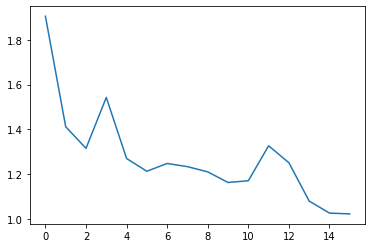

In [20]:
plt.plot(loss_epoch_arr)
plt.show()

In [21]:
from PIL import Image
import torchvision.transforms.functional as TF

In [ ]:
## Just add the path for the file(image)

In [26]:
def predictions():
  image = Image.open('/content/dog.jpg') 
  x = TF.to_tensor(image)
  t=transforms.Scale((32,32))
  t=t(x)
  t=t.reshape(1,3,32,32)
  get_image(t[0],0)
  t=t.to(device)
  out=model(t)
  _,pred_classes=torch.max(out.data,1)
  print(pred_classes)
  return classes[pred_classes]

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:280: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


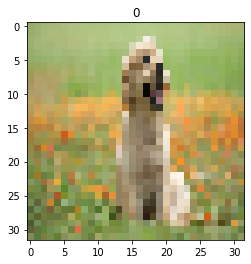

tensor([4], device='cuda:0')


'deer'

In [27]:
predictions()

In [ ]:
class_indx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}